**ENGY-4390** Nuclear Systems Design and Analysis, UMass Lowell, Chem. Eng. Nuclear Program Fall 2024; Prof. V. F. de Almeida

# Heated Plate Cooled by Water Contained by Aluminum w/ Neumann/Robin BC <br> (Gold Solution)
$  
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
  \newcommand{\normal}{\boldsymbol{n}}
  \newcommand{\flux}{\boldsymbol{q}}
  \newcommand{\ihat}{\hat{\boldsymbol{i}}}
  \newcommand{\rhat}{\hat{\boldsymbol{r}}}
  \newcommand{\Ecal}{\mathscr{E}}
  \newcommand{\Dcal}{\mathscr{D}} 
$

**Course:** ENGY-4390 Nuclear Systems Design and Analysis  <br>
**Author: Valmor F. de Almeida** 

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**10Dec2024**

## Objectives

 + Solve a 1-D heat conduction problem with source and fluxes given at the boundaries.
 + Provide results to be used as a reference for other solutions.  

## [Poisson Problem with Neumann/Robin Boundary Conditions](#toc)<a id="problem"></a>

The following sections describe what is referred to in the literature as the one-dimensional Poisson problem with natural boundary conditions. This is a classical boundary-value problem of mathematics.

Solve the Poisson model problem. Find $u:[a,b]\subset\Reals\rightarrow\Reals$ such that:
    
\begin{align*}
 -\bigl(-k(x)\, u'\bigr)'(x) + f(x) &= 0 \quad\quad \forall \quad\quad x\in\ ]a,b[, \\
 q_n(a) &= 0, \\
 q_n(b) &= h_\text{b}\,\bigl(u(b)-u_{\text{ref},b}\bigr).
\end{align*}
   
This problem is linear and has an analytical solution for given data: diffusion coefficient, $k(x)$, and source bias, $f(x)$. The *heat flux* associated to the quantity $u$, is denoted $q := -k(x)\,u'$, and it is often of interest as a derived quantity. Re-writing the above in terms of the differential operator $\Dcal u := -\bigl(-k(\cdot)\, u'\bigr)'(\cdot)$

\begin{align*}
 \Dcal u(x) + f(x) &= 0 \quad\quad \forall \quad\quad x\in\ ]a,b[, \\
 q_n(a) &= 0, \\
 q_n(b) &= h_\text{b}\,\bigl(u(b)-u_{\text{ref},b}\bigr).
\end{align*}

The normal diffusive flux at $x=a$ is $q_n(a) = -(-k\,u'(a)) = 0$ (symmetry), and $x=b$ is $q_n(b) = -k\,u'(b) = h_\text{b}\bigl(u(b)-u_\text{ref}\bigr)$ (cooling).

The values of the normal flux are given on the two end points of the domain. This is called *natural* boundary condition and in this particular case, the Neumann and Robin type.

## [Rayleigh-Ritz Method w/ Neumann/Robin Boundary Conditions](#toc)<a id="rayleigh-ritz-inhomogeneous"></a>

Find $u^*_N \in V_N(a,b)\subset V(a,b) = \bigl\{ u:[a,b]\subset\Reals\rightarrow\Reals \bigr\}$ such that it minimizes the Poisson energy norm:

\begin{equation*}
  \norm{u-u^*_N}^2_{\Ecal} = \min\limits_{u_N\, \in\, V_N} \norm{u-u_N}^2_{\Ecal},
\end{equation*}

where 
$V_N(a,b) := \bigl\{ u_N = \sum\limits_{i=1}^N\,c_i\,\phi_i, (u'_N,u'_N) < \infty \bigr\}$, $\{\phi_i\mid i=1\ldots,N\}$ is a basis of $V_N(a,b)$. The Poisson energy norm is defined as $\norm{v}_{\Ecal} := (\Dcal v,v) = (v, \Dcal v)$.

The optimum coefficients $\cvec^* := \{c_i\mid i=1,\ldots,N\}$ solve

\begin{equation*}
 \overset{(N\times N)}{\Amtrx}\,\overset{(N\times 1)}{\cvec^*} = \overset{(N\times 1)}\bvec ,
\end{equation*}

where:
  + $A_{i,j} = (k\,\phi'_i,\phi'_j) + h_\text{b}\phi_j(b)\,\phi_i(b) $
  + $b_i = (f,\phi_i) + h_\text{b}\,u_{\text{ref},b}\, \phi_i(b)$

### Data
Solve problem with parameter values:

 > a = 0 in <br>
 > b = 0.25 in <br>
 > u_ref(b) = 25 C <br>
 > h_b = 1000 [W/m^2/K] <br>
 > k(x) as below [W/in/K] <br>
 > f(x) as below [W/in^2]

In [1]:
'''SI units'''
from scipy import constants as unit
unit.second = 1.0
unit.meter = 1.0
unit.cm = unit.centi*unit.meter
unit.watt = 1
unit.kelvin = 1

In [2]:
'''Domain'''
x_a = 0.0*unit.inch
x_b = 0.25*unit.inch
x_i1 = 0.05*unit.inch  # first interface
x_i2 = 0.2*unit.inch   # second interface

x_bar = (x_a + x_b)/2.0
x_l   = x_b - x_a

u_ref_b = unit.convert_temperature(25, 'C', 'K')

# Free Convection - water and liquids: 50 - 3000 (W/(m2K))
# Forced Convection - water and liquids:  50 - 10000 (W/(m2K))
htc = 1e-5*unit.watt/unit.meter**2/unit.kelvin 

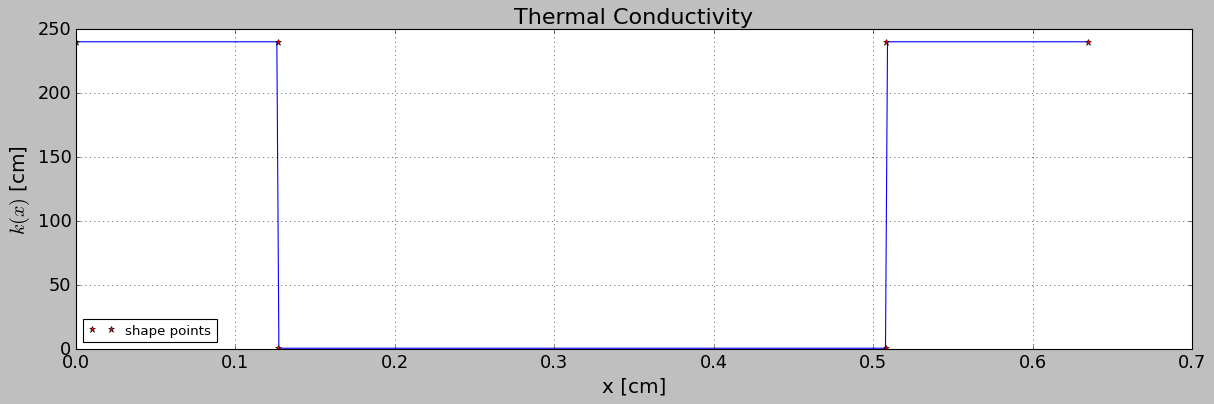

In [3]:
'''Thermal conductivity coefficient function'''
from pyfem1d.toolkit import TargetFunction   

k_cond_plate = 6.096*unit.watt/unit.inch/unit.kelvin
k_cond_coolant = 0.01524*unit.watt/unit.inch/unit.kelvin

shape_pts = [(x_a, k_cond_plate), (x_i1, k_cond_plate), (x_i1, k_cond_coolant), (x_i2, k_cond_coolant),
             (x_i2, k_cond_plate), (x_b, k_cond_plate)]

k_cond_func = TargetFunction(shape_pts, type='linear')
  
k_cond_func.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Thermal Conductivity', y_label=r'$k(x)$ [cm]', x_label='x [cm]', 
                x_scale=1/unit.cm)

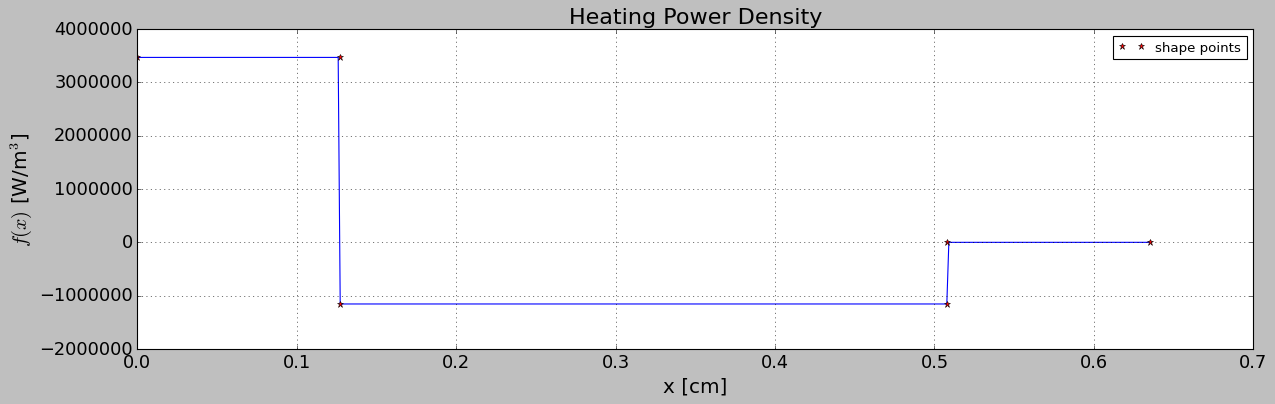

In [4]:
'''Heating power density function'''
from pyfem1d.toolkit import TargetFunction   

heating_pwr_dens = 56.818*unit.watt/unit.inch**3

# Heat sink in the coolant
# negative of heat source scaled by ratio of heater thickness to water channel
heat_sink_pwr_dens = - heating_pwr_dens * (x_i1 - x_a) / (x_i2 - x_i1) 

shape_pts = [(x_a, heating_pwr_dens), (x_i1, heating_pwr_dens), (x_i1, heat_sink_pwr_dens), (x_i2, heat_sink_pwr_dens),
             (x_i2, 0), (x_b, 0)]

heating_pwr_dens_func = TargetFunction(shape_pts, type='linear')
  
heating_pwr_dens_func.plot(n_plot_pts=500, show_shape_pts=True, 
                title='Heating Power Density', y_label=r'$f(x)$ [W/m$^3$]', x_label='x [cm]', 
                x_scale=1/unit.cm)

### Finite Element Basis Functions

Specify basis functions distribution on the material domain and degree.

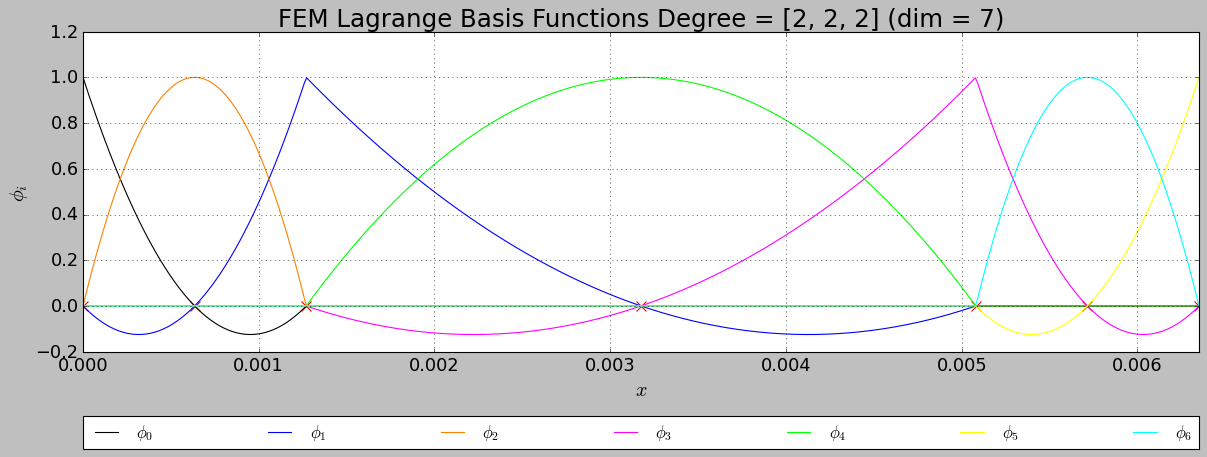

In [22]:
'''Build basis functions'''
from pyfem1d.toolkit import LagrangeFEMBasis 

degree = [2,2,2]
n_elem = [1,1,1]

femlb = LagrangeFEMBasis(degree=degree, n_elem=n_elem, x_partition=[x_a, x_i1, x_i2, x_b])
femlb.plot(n_plot_pts=500, n_legend_cols=15)

#### [Assembly of $\Amtrx$](#toc)<a id="assemble-A-spatial"></a>
  + $A_{i,j} = (k\,\phi'_i,\phi'_j) + h_\text{b}\phi_j(b)\,\phi_i(b) $

In [6]:
'''Build the matrix of coefficients of the linear system'''

a_mtrx = femlb.inner_product_matrix(k_cond_func, "u'", "v'")
a_mtrx += femlb.boundary_inner_product_matrix('right', lambda x: htc, 'u', 'v')  

In [7]:
try:    
    from pyfem1d.toolkit import matrix_rank
except ModuleNotFoundError:
    assert False, 'You need to provide your own code here. Bailing out.'
    
if matrix_rank(a_mtrx, tol=1e-6) == min(a_mtrx.shape):
    print('matrix is full rank.')
else:
    print('matrix is rank deficient.')

import numpy as np
print(np.linalg.matrix_rank(a_mtrx), a_mtrx.shape)

matrix is full rank.
9 (9, 9)


#### [Assembly of $\bvec$](#toc)<a id="assemble-b-spatial"></a>
  + $b_i = (f,\phi_i) + h_\text{b}\,u_{\text{ref},b}\, \phi_i(b)$

In [8]:
'''Build the load vector'''

b_vec = femlb.inner_product_vector(heating_pwr_dens_func, 'v')
b_vec += femlb.boundary_inner_product_vector('right', lambda x: htc * u_ref_b, "v")

#### [Compute Rayleigh-Ritz Solution](#toc)<a id="assemble-b-spatial"></a>

In [9]:
'''Compute optimal coefficients'''
import numpy as np
c_star_vec = np.linalg.solve(a_mtrx, b_vec)

In [10]:
'''Build the best approximation function in V_N'''

def u_star(x):
    u = femlb.evaluation_matrix(x)@c_star_vec
    return u[0] if len(u) == 1 else u

In [11]:
'''Build the derivative '''

def u_prime_star(x):
    u_prime = femlb.evaluation_matrix(x, derivative=True)@c_star_vec
    return u_prime[0] if len(u_prime) == 1 else u_prime

In [12]:
'''Build the heat flux of the best approximation in V_N'''

def heat_flux_x(x):
    q = - k_cond_func(x) * u_prime_star(x)
    return q[0] if len(q) == 1 else q

## Results
Data provided for comparison.

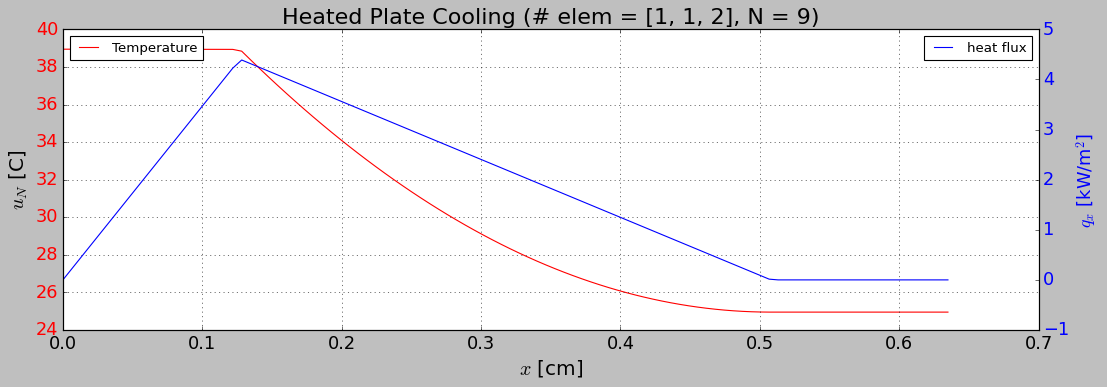

In [13]:
'''Rayleigh Ritz Method with Lagrange FE Basis Functions'''

n_pts = 100
x = np.linspace(x_a, x_b, n_pts)
u_values = u_star(x)
heat_flux_x_values = heat_flux_x(x)

import matplotlib.pyplot as plt
(fig, ax1) = plt.subplots(1, figsize=(14, 5))

ax1.plot(x/unit.cm, unit.convert_temperature(u_values, 'K', 'C'), 'r-', label='Temperature')
ax1.set_xlabel(r'$x$ [cm]', fontsize=18)
ax1.set_ylabel(r'$u_N$ [C]', fontsize=18)
ax1.tick_params(axis='y', labelcolor='red', labelsize=16)
ax1.tick_params(axis='x', labelsize=16)
ax1.legend(loc='upper left', fontsize=12)
ax1.grid(True)

ax2 = ax1.twinx()
ax2.plot(x/unit.cm, heat_flux_x_values/1000,'-', color='blue', label='heat flux')
ax2.set_ylabel(r"$q_x$ [kW/m$^2$]", fontsize=16, color='blue')
ax2.tick_params(axis='y', labelcolor='blue', labelsize=16)
ax2.legend(loc='upper right', fontsize=12)

plt.title(r'Heated Plate Cooling (# elem = '+str(n_elem)+', N = '+str(len(femlb.basis_func_list))+')', fontsize=20)
plt.tight_layout()
plt.savefig('gold-data/03-test-gold.png', dpi=300)
plt.show()

In [14]:
'''Rayleigh-Ritz solution evaluated at the boundaries'''

np.set_printoptions(precision=5)
print('u^*_N:')
print('u^*_N(a) [K]= ', u_star(x_a), '  u^*_N(b) [K]= ', u_star(x_b))
print('')
print("u^*'_N:")
print("u^*'_N(a) [K/m]= ", u_prime_star(x_a), " u^*'_N(b) [K/m]= ", u_prime_star(x_b))

u^*_N:
u^*_N(a) [K]=  312.0944799276458   u^*_N(b) [K]=  298.10202216930156

u^*'_N:
u^*'_N(a) [K/m]=  1.1641532182693481e-10  u^*'_N(b) [K/m]=  1.862645149230957e-09


In [15]:
'''Normal heat flux at x = a'''

n_x = -1.0
print('qn_x(a) [kW/m^2]= ', -k_cond_func(x_a)*u_prime_star(x_a)/unit.kilo * n_x)

qn_x(a) [kW/m^2]=  2.7939677238464354e-11


In [16]:
'''Normal heat flux at x = b'''

n_x = 1.0
print('qn_x(b) [kW/m^2]= ', -k_cond_func(x_b)*u_prime_star(x_b)/unit.kilo * n_x)

qn_x(b) [kW/m^2]=  -4.4703483581542967e-10


In [17]:
x_vec = np.linspace(x_a, x_b, 30)
u_n_vec_C = unit.convert_temperature(u_star(x_vec), 'K', 'C')
q_x_vec = -k_cond_func(x_vec)*u_prime_star(x_vec)

print('x [cm]        u_n [C]       q_x [kW/m^2]  ')
for (x, u_n_C, q_x) in zip(x_vec, u_n_vec_C, q_x_vec):
    print('%+2.5e  %+2.5e  %+2.5e'%(x/unit.cm, u_n_C, q_x/unit.kilo))

x [cm]        u_n [C]       q_x [kW/m^2]  
+0.00000e+00  +3.89445e+01  -2.09548e-11
+2.18966e-02  +3.89441e+01  +7.59208e-01
+4.37931e-02  +3.89431e+01  +1.51842e+00
+6.56897e-02  +3.89414e+01  +2.27762e+00
+8.75862e-02  +3.89389e+01  +3.03683e+00
+1.09483e-01  +3.89358e+01  +3.79604e+00
+1.31379e-01  +3.86133e+01  +4.35279e+00
+1.53276e-01  +3.70709e+01  +4.09972e+00
+1.75172e-01  +3.56210e+01  +3.84665e+00
+1.97069e-01  +3.42633e+01  +3.59358e+00
+2.18966e-01  +3.29981e+01  +3.34051e+00
+2.40862e-01  +3.18251e+01  +3.08744e+00
+2.62759e-01  +3.07446e+01  +2.83437e+00
+2.84655e-01  +2.97564e+01  +2.58131e+00
+3.06552e-01  +2.88605e+01  +2.32824e+00
+3.28448e-01  +2.80570e+01  +2.07517e+00
+3.50345e-01  +2.73459e+01  +1.82210e+00
+3.72241e-01  +2.67271e+01  +1.56903e+00
+3.94138e-01  +2.62007e+01  +1.31596e+00
+4.16034e-01  +2.57666e+01  +1.06289e+00
+4.37931e-01  +2.54249e+01  +8.09821e-01
+4.59828e-01  +2.51755e+01  +5.56752e-01
+4.81724e-01  +2.50185e+01  +3.03683e-01
+5.03621e-01  

## Observation:
Since the exact solution to this Poisson problem is a quadratic function, and the finite element used is a Lagrange polynomial basis function of degree 2, even a single element can generate a numerical solution that matches the exact solution.

In [18]:
x_vec/unit.cm

array([0.     , 0.0219 , 0.04379, 0.06569, 0.08759, 0.10948, 0.13138,
       0.15328, 0.17517, 0.19707, 0.21897, 0.24086, 0.26276, 0.28466,
       0.30655, 0.32845, 0.35034, 0.37224, 0.39414, 0.41603, 0.43793,
       0.45983, 0.48172, 0.50362, 0.52552, 0.54741, 0.56931, 0.59121,
       0.6131 , 0.635  ])

In [19]:
u_n_vec_C

array([38.94448, 38.94413, 38.94309, 38.94136, 38.93894, 38.93582,
       38.61328, 37.07094, 35.62095, 34.26332, 32.99805, 31.82513,
       30.74457, 29.75637, 28.86052, 28.05702, 27.34588, 26.7271 ,
       26.20067, 25.7666 , 25.42488, 25.17552, 25.01852, 24.95387,
       24.95202, 24.95202, 24.95202, 24.95202, 24.95202, 24.95202])

In [20]:
q_x_vec/unit.kilo

array([-2.09548e-11,  7.59208e-01,  1.51842e+00,  2.27762e+00,
        3.03683e+00,  3.79604e+00,  4.35279e+00,  4.09972e+00,
        3.84665e+00,  3.59358e+00,  3.34051e+00,  3.08744e+00,
        2.83437e+00,  2.58131e+00,  2.32824e+00,  2.07517e+00,
        1.82210e+00,  1.56903e+00,  1.31596e+00,  1.06289e+00,
        8.09821e-01,  5.56752e-01,  3.03683e-01,  5.06138e-02,
       -1.11759e-10, -1.67638e-10, -1.67638e-10, -3.53949e-10,
       -3.98329e-10, -4.68061e-10])

In [21]:
'''Save text file with values'''

x_vec = np.linspace(x_a, x_b, 100)
u_n_vec = u_star(x_vec)
q_x_vec = -k_cond_func(x_vec)*u_prime_star(x_vec)

np.savetxt('gold-data/03-test-gold.txt', (x_vec/unit.cm, unit.convert_temperature(u_n_vec, 'K','C'), q_x_vec/unit.kilo), delimiter=' ', fmt='%2.6e') 

# For reading do: (x,u,q) = np.loadtxt('01-test-gold.txt')

## References

- [1] V. F. de Almeida, [*Engy-5330: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5330), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).